# About UEFA Champions League

The UEFA Champions League is an annual club football competition organised by the Union of European Football Associations and contested by top-division European clubs, deciding the competition winners through a round robin group stage to qualify for a double-legged knockout format, and a single leg final.

# Challenges

    * Discover the weak points of any team.
    * Suggest players need to be sold, based on performance analysis.
    * Nominate Player of the season


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the csv files

df_attack = pd.read_csv("../data/UCL-League/attacking.csv")
df_attempt = pd.read_csv("../data/UCL-League/attempts.csv")
df_defend = pd.read_csv("../data/UCL-League/defending.csv")
df_discipline = pd.read_csv("../data/UCL-League/disciplinary.csv")
df_distribution = pd.read_csv("../data/UCL-League/distributon.csv")
df_goal_keep = pd.read_csv("../data/UCL-League/goalkeeping.csv")
df_goal = pd.read_csv("../data/UCL-League/goals.csv")
df_key_stats = pd.read_csv("../data/UCL-League/key_stats.csv")

# First 5 columns of all CSV files

In [3]:
# Attacking
df_attack.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [4]:
# Attempts by each player
df_attempt.head()

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [5]:
# Defending by each player
df_defend.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [6]:
# Disciplinary 
df_discipline.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [7]:
# Distribution
df_distribution.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [8]:
# Goal Keeping
df_goal_keep.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [9]:
# Goals
df_goal.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [10]:
# Overall stats
df_key_stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


# Exploratory Data Analysis (EDA)

## Looking into Attacking csv

In [11]:
df_attack.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [12]:
df_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   serial        176 non-null    int64 
 1   player_name   176 non-null    object
 2   club          176 non-null    object
 3   position      176 non-null    object
 4   assists       176 non-null    int64 
 5   corner_taken  176 non-null    int64 
 6   offsides      176 non-null    int64 
 7   dribbles      176 non-null    int64 
 8   match_played  176 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.5+ KB


In [13]:
df_attack.columns

Index(['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken',
       'offsides', 'dribbles', 'match_played'],
      dtype='object')

In [14]:
df_attack.describe()

,serial,assists,corner_taken,offsides,dribbles,match_played
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,47.613636,1.596591,3.340909,1.420455,8.982955,6.988636
std,22.527916,1.042957,6.266257,2.246122,11.190034,2.563454
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,1.000000,0.000000,0.000000,2.000000,5.000000
50%,64.000000,1.000000,0.000000,0.000000,5.000000,6.500000
75%,64.000000,2.000000,4.250000,2.000000,12.000000,8.000000
max,64.000000,7.000000,36.000000,10.000000,83.000000,13.000000


In [15]:
df_attack.ndim

2

In [16]:
df_attack.count()

serial          176
player_name     176
club            176
position        176
assists         176
corner_taken    176
offsides        176
dribbles        176
match_played    176
dtype: int64

In [17]:
df_attack.isna().sum()

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64

### As there are no null values we can move forward to do the visualizations. 

In [18]:
# Remove it after
df_attack.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [19]:
df_attack["club"].value_counts()

Liverpool           14
Bayern              11
Ajax                11
Man. City           11
Chelsea             11
Real Madrid         10
Atalanta             9
Leipzig              8
Villarreal           7
Zenit                6
Sporting CP          6
Club Brugge          5
Inter                5
Juventus             5
Dortmund             5
Atlético             5
Milan                5
Benfica              5
Salzburg             5
Young Boys           4
Man. United          4
Paris                4
LOSC                 3
Sheriff              3
Sevilla              3
Porto                3
Wolfsburg            2
Shakhtar Donetsk     2
Beşiktaş             1
Dynamo Kyiv          1
Barcelona            1
Malmö                1
Name: club, dtype: int64

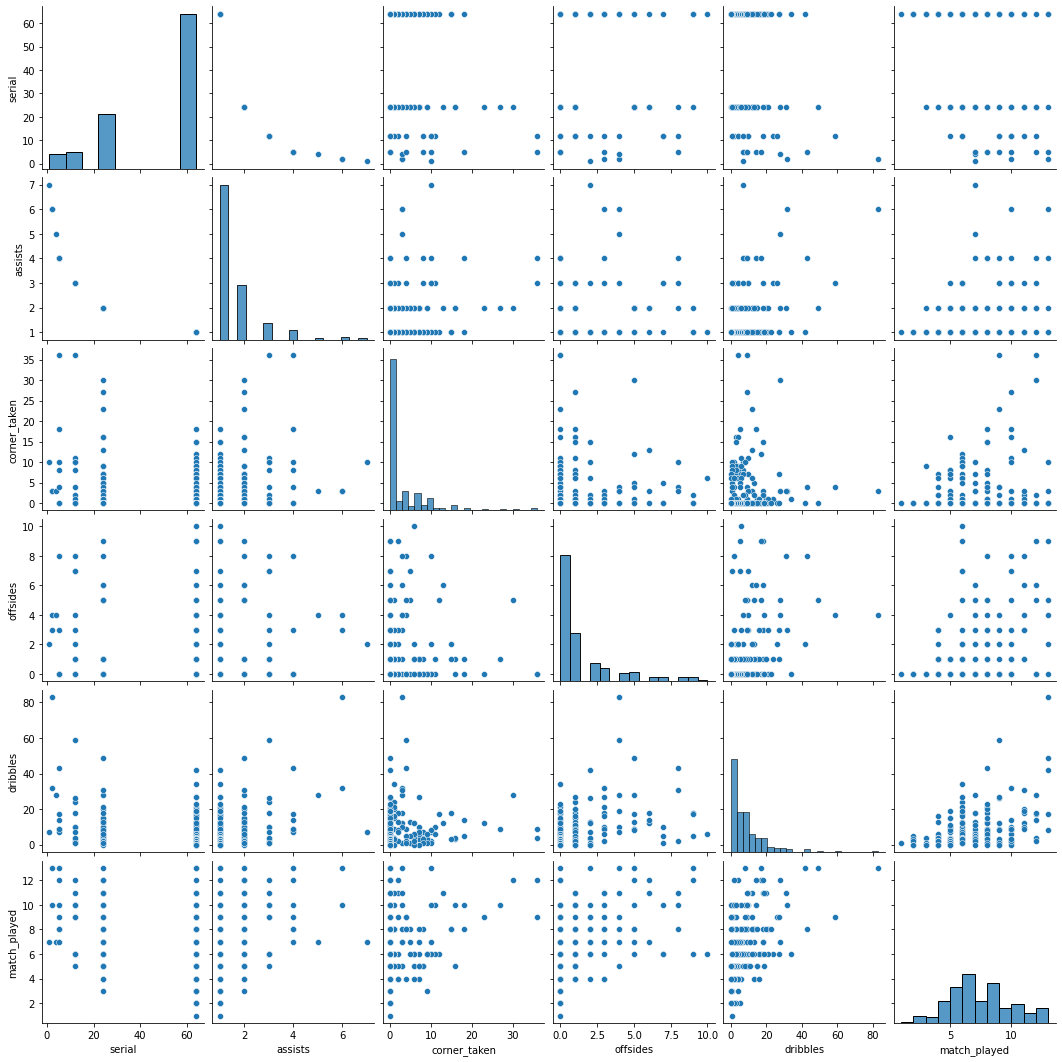

In [20]:
sns.pairplot(df_attack);

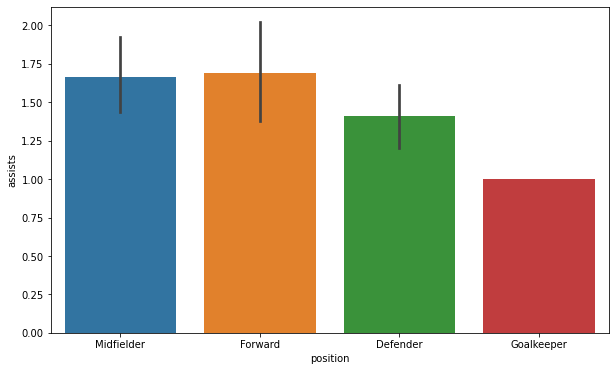

In [21]:
plt.figure(figsize=(10,6));
sns.barplot(data=df_attack, x= "position", y= "assists");

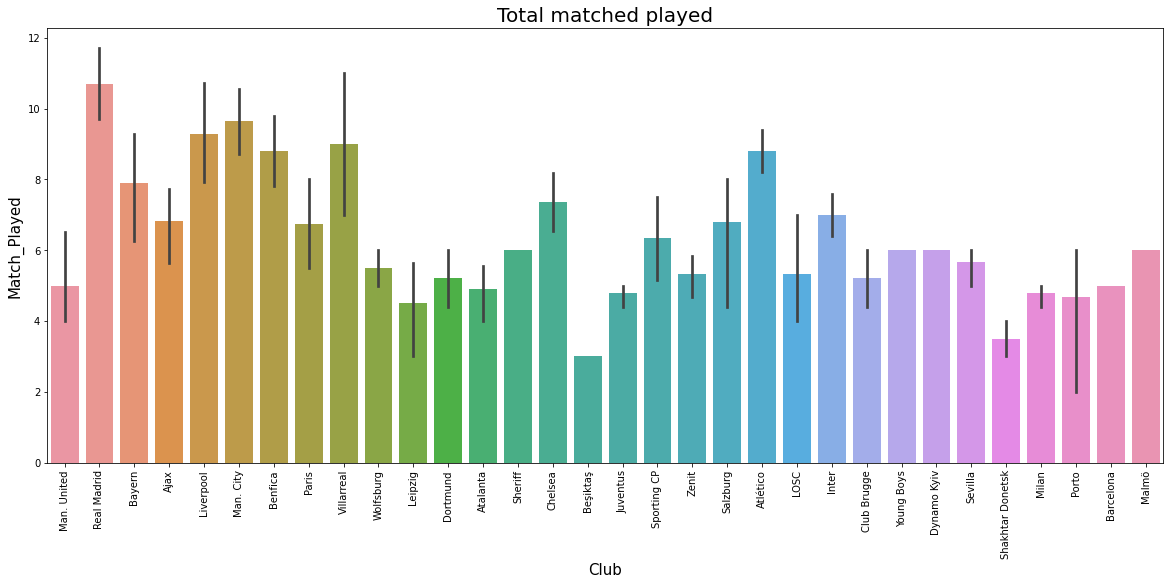

In [22]:
plt.figure(figsize= (20, 8))

plt.xticks(rotation= 'vertical')

sns.barplot(data= df_attack, x= "club", y= "match_played")

plt.xlabel("Club", loc='center', fontdict={'fontsize': 15})
plt.ylabel("Match_Played", loc='center', fontdict={'fontsize': 15})
plt.title("Total matched played", fontdict={'fontsize': 20});


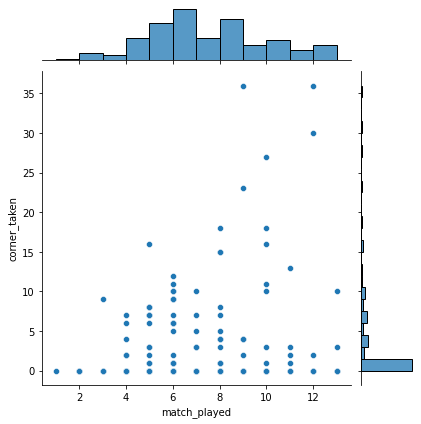

In [23]:
sns.jointplot(data = df_attack, x = 'match_played', y = 'corner_taken');

In [24]:
df_attack.columns

Index(['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken',
       'offsides', 'dribbles', 'match_played'],
      dtype='object')